In [4]:
## Individual Project - Drag force 

import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np

# I will start with Hypercars, couldn't find frontal area for newer models or for other manufacturers 
# but comparing those two give a good idea about importance of aero, since one is using a W16 quadturbo engine 
# and the other is using a twin turbo V8, with half the the engine size the Koeniggsegg is able to achieve similar
# or even performance considering one the agera is RWD vs AWD for the veyron

data = pd.read_csv('Final Project Data.csv')
data.head

<bound method NDFrame.head of    Category           Make                           Model         Year    Cd  \
0     Super           Audi                              R8    2007-2015  0.36   
1     Sport            BMW                    5-Series F10    2010-2016  0.27   
2     Hyper        bugatti                          Veyron    2005-2011  0.36   
3     Sport      Chevrolet                 Corvette C7 ZR1        2014+  0.32   
4     Super        Ferrari                  F12 Berlinetta    2012-2017  0.30   
5     Sport          Honda                  NSX-R Facelift         2002  0.34   
6     Hyper     Koenigsegg  Agera with adaptable wing down    2011-2017  0.33   
7     Super    Lamborghini               Aventador LP700-4        2013-  0.33   
8     Sport          Mazda                    RX-7 FD base    1992-2002  0.29   
9     Super  Mercedes-Benz              SLS AMG C197 Coupe    2010-2014  0.36   
10    Sport     Mitsubishi         Lancer CZ4A Evolution X    2007-2015  0.34  

In [5]:
#Picking Hypercars Data

data.loc[data['Category'] == 'Hyper']

,Category,Make,Model,Year,Cd,Frontal Area (m^2),CdA (m^2)
2,Hyper,bugatti,Veyron,2005-2011,0.36,2.071737,0.745825
6,Hyper,Koenigsegg,Agera with adaptable wing down,2011-2017,0.33,1.876641,0.619291


In [6]:
#Calculating Drag force and hp needed at speeds from 0-400km/h

# Frontal Area (m^2)

A1 = 2.0717369
A2 = 1.8766406

# Density of air(kg/m^3)

rho = 1.225

# Drag Coefficient

Cd1 = 0.36
Cd2 = 0.33

CdA1 = 0.745825
CdA2 = 0.619291

# Velocity m/s

v = np.linspace(0,111.11,10)

# Drag Force 

DF1 = []
DF2 = []
HP1 = []
HP2 = []

for i in v:
    
    D1 = 0.5 * rho * i * i * A1 *Cd1
    DF1.append (D1)
    
    hp1 = (0.5 * rho * i*i*i * A1 * CdA1)/746
    HP1.append (hp1)
    
for i in v:
    
    D2 = 0.5 * rho * i * i * A2 *Cd2
    DF2.append (D2)
    
    hp2 = (0.5 * rho * i*i*i * A2 * CdA2)/746
    HP2.append (hp2)
    


In [7]:
# Dragforce table

t_Dragforce = pd.DataFrame({'Velocity': v, 'Veyron Drag force': DF1, 'Agera Drag Force': DF2})
print(t_Dragforce)

     Velocity  Veyron Drag force  Agera Drag Force
0    0.000000           0.000000          0.000000
1   12.345556          69.624882         57.812589
2   24.691111         278.499528        231.250355
3   37.036667         626.623937        520.313299
4   49.382222        1113.998110        925.001420
5   61.727778        1740.622047       1445.314720
6   74.073333        2506.495748       2081.253196
7   86.418889        3411.619213       2832.816850
8   98.764444        4455.992442       3700.005682
9  111.110000        5639.615434       4682.819691


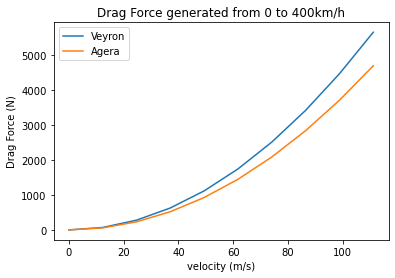

In [8]:
#Plot

plt.plot(v,DF1, label= 'Veyron')
plt.plot(v,DF2, label= 'Agera')
plt.xlabel('velocity (m/s)')
plt.ylabel('Drag Force (N)')
plt.title('Drag Force generated from 0 to 400km/h')
plt.legend()
plt.show()

In [9]:
# hp table

t_hp = pd.DataFrame({'Velocity': v, 'Veyron hp needed': HP1, 'Agera hp needed': HP2})
print(t_hp)

     Velocity  Veyron hp needed  Agera hp needed
0    0.000000          0.000000         0.000000
1   12.345556          2.387101         1.795457
2   24.691111         19.096805        14.363658
3   37.036667         64.451716        48.477344
4   49.382222        152.774437       114.909261
5   61.727778        298.387572       224.432150
6   74.073333        515.613725       387.818755
7   86.418889        818.775499       615.841819
8   98.764444       1222.195497       919.274085
9  111.110000       1740.196322      1308.888297


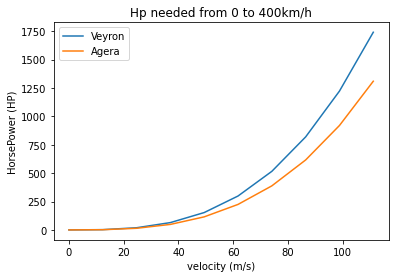

In [10]:
#Plot

plt.plot(v,HP1, label= 'Veyron')
plt.plot(v,HP2, label= 'Agera')
plt.xlabel('velocity (m/s)')
plt.ylabel('HorsePower (HP)')
plt.title('Hp needed from 0 to 400km/h')
plt.legend()
plt.show()

# From the graph, we can see that the Bugatti Veyron needs 400hp 
# at speeds approaching 400km/h to overcome drag force generated 
# compared to Koenigsegg Agera

In [11]:
#Picking Supercars Data

data.loc[data['Category'] == 'Super']

,Category,Make,Model,Year,Cd,Frontal Area (m^2),CdA (m^2)
0,Super,Audi,R8,2007-2015,0.36,2.025285,0.729103
4,Super,Ferrari,F12 Berlinetta,2012-2017,0.30,2.062447,0.618734
7,Super,Lamborghini,Aventador LP700-4,2013-,0.33,1.904511,0.628489
9,Super,Mercedes-Benz,SLS AMG C197 Coupe,2010-2014,0.36,2.140485,0.770575
11,Super,Porsche,997 GT3 RS,2007-2013,0.33,2.071737,0.683673
12,Super,Porsche,991 Turbo,2013-,0.31,2.071737,0.642238


In [12]:
#Calculating Drag force and hp needed at speeds from 0-300km/h

# Frontal Area (m^2)

A1 = 2.025285
A2 = 2.062447
A3 = 1.904511
A4 = 2.140485
A5 = 2.071737
A6 = 2.071737

# Density of air(kg/m^3)

rho = 1.225

# Drag Coefficient

Cd1 = 0.36
Cd2 = 0.30
Cd3 = 0.33
Cd4 = 0.36
Cd5 = 0.33
Cd6 = 0.31

CdA1 = 0.729103
CdA2 = 0.618734
CdA3 = 0.628489
CdA4 = 0.770575 
CdA5 = 0.683673
CdA6 = 0.642238 

# Velocity m/s

v = np.linspace(0,83.33,10)

# creating arrays for Drag Force & horsepower needed 

DF1 = []
DF2 = []
DF3 = []
DF4 = []
DF5 = []
DF6 = []

HP1 = []
HP2 = []
HP3 = []
HP4 = []
HP5 = []
HP6 = []

for i in v:
    
    D1 = 0.5 * rho * i * i * A1 *Cd1
    DF1.append (D1)
    
    hp1 = (0.5 * rho * i*i*i * A1 * CdA1)/746
    HP1.append (hp1)
    
for i in v:
    
    D2 = 0.5 * rho * i * i * A2 *Cd2
    DF2.append (D2)
    
    hp2 = (0.5 * rho * i*i*i * A2 * CdA2)/746
    HP2.append (hp2)

for i in v:
    
    D3 = 0.5 * rho * i * i * A3 *Cd3
    DF3.append (D3)
    
    hp3 = (0.5 * rho * i*i*i * A3 * CdA3)/746
    HP3.append (hp3)
    
for i in v:
    
    D4 = 0.5 * rho * i * i * A4 *Cd4
    DF4.append (D4)
    
    hp4 = (0.5 * rho * i*i*i * A4 * CdA4)/746
    HP4.append (hp4)
    
for i in v:
    
    D5 = 0.5 * rho * i * i * A5 *Cd5
    DF5.append (D5)
    
    hp5 = (0.5 * rho * i*i*i * A5 * CdA5)/746
    HP5.append (hp5)
    
for i in v:
    
    D6 = 0.5 * rho * i * i * A6 *Cd6
    DF6.append (D6)
    
    hp6 = (0.5 * rho * i*i*i * A6 * CdA6)/746
    HP6.append (hp6)
    


In [13]:
# Dragforce table

t_Dragforce = pd.DataFrame({'Velocity': v, 'R8 Drag force': DF1, 
                            'F12 Berlinetta Drag Force': DF2, 
                            'Aventador LP700-4 Drag Force': DF3,                           
                            'SLS AMG Drag Force': DF4, 
                            '997 GT3 RS Drag Force': DF5,
                            '911 Turbo Drag Force': DF6})
print(t_Dragforce)

    Velocity  R8 Drag force  F12 Berlinetta Drag Force  \
0   0.000000       0.000000                   0.000000   
1   9.258889      38.283575                  32.488368   
2  18.517778     153.134299                 129.953470   
3  27.776667     344.552174                 292.395308   
4  37.035556     612.537198                 519.813881   
5  46.294444     957.089372                 812.209188   
6  55.553333    1378.208695                1169.581231   
7  64.812222    1875.895168                1591.930009   
8  74.071111    2450.148791                2079.255522   
9  83.330000    3100.969564                2631.557770   

   Aventador LP700-4 Drag Force  SLS AMG Drag Force  997 GT3 RS Drag Force  \
0                      0.000000            0.000000               0.000000   
1                     33.000556           40.461178              35.898177   
2                    132.002226          161.844714             143.592710   
3                    297.005008          364.1506

In [14]:
# HorsePower table

t_HP = pd.DataFrame({'Velocity': v, 'R8 Horsepower needed': HP1, 
                            'F12 Berlinetta Horsepower needed': HP2, 
                            'Aventador LP700-4 Drag Horsepower needed': HP3,                           
                            'SLS AMG Drag Horsepower needed': HP4, 
                            '997 GT3 RS Drag Horsepower needed': HP5,
                            '911 Turbo Drag Horsepower needed': HP6})
print(t_HP)

    Velocity  R8 Horsepower needed  F12 Berlinetta Horsepower needed  \
0   0.000000              0.000000                          0.000000   
1   9.258889              0.962319                          0.831631   
2  18.517778              7.698549                          6.653048   
3  27.776667             25.982604                         22.454037   
4  37.035556             61.588395                         53.224383   
5  46.294444            120.289834                        103.953873   
6  55.553333            207.860834                        179.632292   
7  64.812222            330.075306                        285.249427   
8  74.071111            492.707162                        425.795064   
9  83.330000            701.530314                        606.258987   

   Aventador LP700-4 Drag Horsepower needed  SLS AMG Drag Horsepower needed  \
0                                  0.000000                        0.000000   
1                                  0.780055      

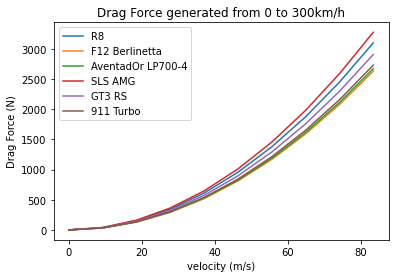

In [15]:
#Plot Drag force for super cars

plt.plot(v,DF1, label= 'R8')
plt.plot(v,DF2, label= 'F12 Berlinetta')
plt.plot(v,DF3, label= 'AventadOr LP700-4')
plt.plot(v,DF4, label= 'SLS AMG')
plt.plot(v,DF5, label= 'GT3 RS')
plt.plot(v,DF6, label= '911 Turbo')

plt.xlabel('velocity (m/s)')
plt.ylabel('Drag Force (N)')
plt.title('Drag Force generated from 0 to 300km/h')
plt.legend()
plt.show()

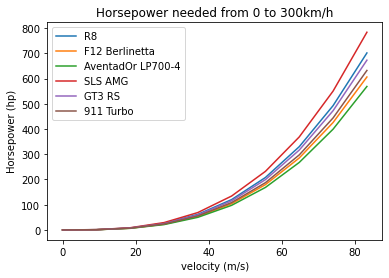

In [16]:
#Plot Hp needed for Supercars

plt.plot(v,HP1, label= 'R8')
plt.plot(v,HP2, label= 'F12 Berlinetta')
plt.plot(v,HP3, label= 'AventadOr LP700-4')
plt.plot(v,HP4, label= 'SLS AMG')
plt.plot(v,HP5, label= 'GT3 RS')
plt.plot(v,HP6, label= '911 Turbo')

plt.xlabel('velocity (m/s)')
plt.ylabel('Horsepower (hp)')
plt.title('Horsepower needed from 0 to 300km/h')
plt.legend()
plt.show()

In [17]:
#Picking Sport cars Data

data.loc[data['Category'] == 'Sport']

,Category,Make,Model,Year,Cd,Frontal Area (m^2),CdA (m^2)
1,Sport,BMW,5-Series F10,2010-2016,0.27,2.350446,0.634620
3,Sport,Chevrolet,Corvette C7 ZR1,2014+,0.32,2.059660,0.659091
5,Sport,Honda,NSX-R Facelift,2002,0.34,1.780021,0.605207
8,Sport,Mazda,RX-7 FD base,1992-2002,0.29,1.789312,0.518900
10,Sport,Mitsubishi,Lancer CZ4A Evolution X,2007-2015,0.34,2.278911,0.774830
13,Sport,Toyota,Supra A80,1993-2002,0.32,1.867350,0.597552


In [18]:
#Calculating Drag force and hp needed at speeds from 0-300km/h

# Frontal Area (m^2)

A1 = 2.350446
A2 = 2.059660
A3 = 1.780021
A4 = 1.789312
A5 = 2.278911
A6 = 1.867350

# Density of air(kg/m^3)

rho = 1.225

# Drag Coefficient

Cd1 = 0.27
Cd2 = 0.32
Cd3 = 0.34
Cd4 = 0.29
Cd5 = 0.34
Cd6 = 0.32

CdA1 = 0.634620
CdA2 = 0.659091
CdA3 = 0.605207
CdA4 = 0.518900 
CdA5 = 0.774830
CdA6 = 0.597552 

# Velocity m/s

v = np.linspace(0,83.33,10)

# creating arrays for Drag Force & horsepower needed 

DF1 = []
DF2 = []
DF3 = []
DF4 = []
DF5 = []
DF6 = []

HP1 = []
HP2 = []
HP3 = []
HP4 = []
HP5 = []
HP6 = []

for i in v:
    
    D1 = 0.5 * rho * i * i * A1 *Cd1
    DF1.append (D1)
    
    hp1 = (0.5 * rho * i*i*i * A1 * CdA1)/746
    HP1.append (hp1)
    
for i in v:
    
    D2 = 0.5 * rho * i * i * A2 *Cd2
    DF2.append (D2)
    
    hp2 = (0.5 * rho * i*i*i * A2 * CdA2)/746
    HP2.append (hp2)

for i in v:
    
    D3 = 0.5 * rho * i * i * A3 *Cd3
    DF3.append (D3)
    
    hp3 = (0.5 * rho * i*i*i * A3 * CdA3)/746
    HP3.append (hp3)
    
for i in v:
    
    D4 = 0.5 * rho * i * i * A4 *Cd4
    DF4.append (D4)
    
    hp4 = (0.5 * rho * i*i*i * A4 * CdA4)/746
    HP4.append (hp4)
    
for i in v:
    
    D5 = 0.5 * rho * i * i * A5 *Cd5
    DF5.append (D5)
    
    hp5 = (0.5 * rho * i*i*i * A5 * CdA5)/746
    HP5.append (hp5)
    
for i in v:
    
    D6 = 0.5 * rho * i * i * A6 *Cd6
    DF6.append (D6)
    
    hp6 = (0.5 * rho * i*i*i * A6 * CdA6)/746
    HP6.append (hp6)

In [19]:
# Dragforce table

t_Dragforce = pd.DataFrame({'Velocity': v, 'BMW F10 Drag force': DF1, 
                            'ZR1 Drag Force': DF2, 
                            'NSX-R Drag Force': DF3,                           
                            'FD3S Drag Force': DF4, 
                            'EVO X Drag Force': DF5,
                            'SUPRA A80 Drag Force': DF6})
print(t_Dragforce)

    Velocity  BMW F10 Drag force  ZR1 Drag Force  NSX-R Drag Force  \
0   0.000000            0.000000        0.000000          0.000000   
1   9.258889           33.322523       34.607430         31.778097   
2  18.517778          133.290093      138.429721        127.112386   
3  27.776667          299.902709      311.466871        286.002869   
4  37.035556          533.160372      553.718882        508.449546   
5  46.294444          833.063082      865.185754        794.452415   
6  55.553333         1199.610838     1245.867485       1144.011477   
7  64.812222         1632.803640     1695.764077       1557.126733   
8  74.071111         2132.641490     2214.875529       2033.798182   
9  83.330000         2699.124385     2803.201842       2574.025824   

   FD3S Drag Force  EVO X Drag Force  SUPRA A80 Drag Force  
0         0.000000          0.000000              0.000000  
1        27.246324         40.684606             31.376142  
2       108.985294        162.738426          

In [21]:
# HorsePower table

t_HP = pd.DataFrame({'Velocity': v, 'BMW F10 Drag force': HP1, 
                            'ZR1 Drag Force': HP2, 
                            'NSX-R Drag Force': HP3,                           
                            'FD3S Drag Force': HP4, 
                            'EVO X Drag Force': HP5,
                            'SUPRA A80 Drag Force': HP6})
print(t_HP)

    Velocity  BMW F10 Drag force  ZR1 Drag Force  NSX-R Drag Force  \
0   0.000000            0.000000        0.000000          0.000000   
1   9.258889            0.972093        0.884677          0.702058   
2  18.517778            7.776746        7.077417          5.616463   
3  27.776667           26.246517       23.886282         18.955564   
4  37.035556           62.213966       56.619336         44.931708   
5  46.294444          121.511653      110.584641         87.757242   
6  55.553333          209.972136      191.090259        151.644514   
7  64.812222          333.427976      303.444255        240.805871   
8  74.071111          497.711730      452.954689        359.453662   
9  83.330000          708.655960      644.929625        511.800233   

   FD3S Drag Force  EVO X Drag Force  SUPRA A80 Drag Force  
0         0.000000          0.000000              0.000000  
1         0.605081          1.150741              0.727186  
2         4.840649          9.205930          

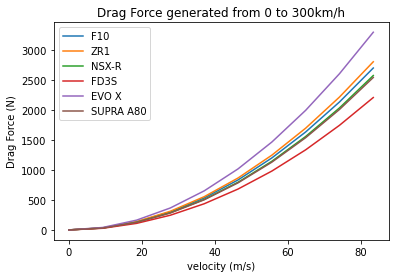

In [22]:
#Plot Drag force for super cars

plt.plot(v,DF1, label= 'F10')
plt.plot(v,DF2, label= 'ZR1')
plt.plot(v,DF3, label= 'NSX-R')
plt.plot(v,DF4, label= 'FD3S')
plt.plot(v,DF5, label= 'EVO X')
plt.plot(v,DF6, label= 'SUPRA A80')

plt.xlabel('velocity (m/s)')
plt.ylabel('Drag Force (N)')
plt.title('Drag Force generated from 0 to 300km/h')
plt.legend()
plt.show()

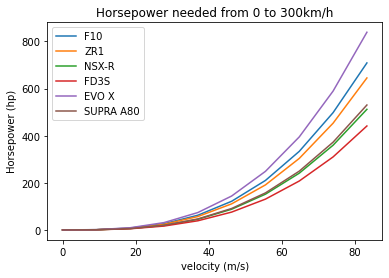

In [23]:
#Plot Hp needed for Supercars

plt.plot(v,HP1, label= 'F10')
plt.plot(v,HP2, label= 'ZR1')
plt.plot(v,HP3, label= 'NSX-R')
plt.plot(v,HP4, label= 'FD3S')
plt.plot(v,HP5, label= 'EVO X')
plt.plot(v,HP6, label= 'SUPRA A80')

plt.xlabel('velocity (m/s)')
plt.ylabel('Horsepower (hp)')
plt.title('Horsepower needed from 0 to 300km/h')
plt.legend()
plt.show()